# 1. Introduction

The problem at hand involves developing a predictive model to estimate the weight of a passenger vehicle based on various vehicle attributes. Accurately predicting vehicle weight is essential for various applications, including transportation planning, automotive engineering, and environmental impact assessments.

To address this problem, the following steps will be undertaken:
1. Data Preparation: This involves loading the dataset, renaming columns for clarity, and performing necessary data cleaning. This step ensures that the dataset is well-structured and ready for analysis.

2. Exploratory Data Analysis (EDA): A thorough EDA will be conducted to understand the nature of each variable. This includes checking for missing values, analyzing distributions through histograms, exploring relationships between variables via scatter plots and correlation matrices, and identifying any outliers or anomalies. The EDA will help in gaining insights into the dataset and in identifying potential predictive relationships between the explanatory variables and the response variable (vehicle weight).

3. Statistical Analysis: Descriptive statistics will be computed for each variable to understand their central tendencies and variabilities. This analysis will provide a foundational understanding of the data.

4. Model Building: Based on the insights gained from the EDA, at least two linear regression models will be constructed using different sets of explanatory variables. These models will serve as candidates for predicting the vehicle weight.

5. Model Evaluation: The models will be evaluated using K-fold cross-validation to assess their predictive performance. This step is crucial in determining the effectiveness and robustness of the models.

6. Conclusion and Recommendations: The final step will involve interpreting the results, drawing conclusions from the analysis, and making recommendations based on the findings. The model with the best performance will be highlighted as the preferred choice for predicting vehicle weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [2]:
# Define your column names in a list
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
               'drive_wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
               'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
               'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Reading CSV and assigning column names
url_csv = "https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/M2%20assign%20Cross%20Validating%20a%20Linear%20Regression%20Model/M2_Data.csv"
df = pd.read_csv(url_csv, header=None, names=column_names)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# left only needed variables
selected_columns = ['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'curb-weight']
df_selected = df[selected_columns]

In [4]:
# Converting numeric columns that are read as objects to numeric
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# 2. Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [5]:
df_selected.info

<bound method DataFrame.info of      height  width  length  wheel-base  engine-size  horsepower  peak-rpm  \
0      48.8   64.1   168.8        88.6          130       111.0    5000.0   
1      48.8   64.1   168.8        88.6          130       111.0    5000.0   
2      52.4   65.5   171.2        94.5          152       154.0    5000.0   
3      54.3   66.2   176.6        99.8          109       102.0    5500.0   
4      54.3   66.4   176.6        99.4          136       115.0    5500.0   
..      ...    ...     ...         ...          ...         ...       ...   
200    55.5   68.9   188.8       109.1          141       114.0    5400.0   
201    55.5   68.8   188.8       109.1          141       160.0    5300.0   
202    55.5   68.9   188.8       109.1          173       134.0    5500.0   
203    55.5   68.9   188.8       109.1          145       106.0    4800.0   
204    55.5   68.9   188.8       109.1          141       114.0    5400.0   

     city-mpg  curb-weight  
0          21 

In [6]:
df_selected.describe()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
count,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,203.000000,205.000000,205.000000
mean,53.724878,65.907805,174.049268,98.756585,126.907317,104.256158,5125.369458,25.219512,2555.565854
std,2.443522,2.145204,12.337289,6.021776,41.642693,39.714369,479.334560,6.542142,520.680204
min,47.800000,60.300000,141.100000,86.600000,61.000000,48.000000,4150.000000,13.000000,1488.000000
25%,52.000000,64.100000,166.300000,94.500000,97.000000,70.000000,4800.000000,19.000000,2145.000000
50%,54.100000,65.500000,173.200000,97.000000,120.000000,95.000000,5200.000000,24.000000,2414.000000
75%,55.500000,66.900000,183.100000,102.400000,141.000000,116.000000,5500.000000,30.000000,2935.000000
max,59.800000,72.300000,208.100000,120.900000,326.000000,288.000000,6600.000000,49.000000,4066.000000


In [7]:
# Checking for missing values
missing_values = df_selected.isnull().sum()
missing_values

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     2
peak-rpm       2
city-mpg       0
curb-weight    0
dtype: int64

In [8]:
# Filling missing values with the mean of their respective columns
df_selected = df_selected.fillna(df_selected.mean())

## Histograms for Each Variable

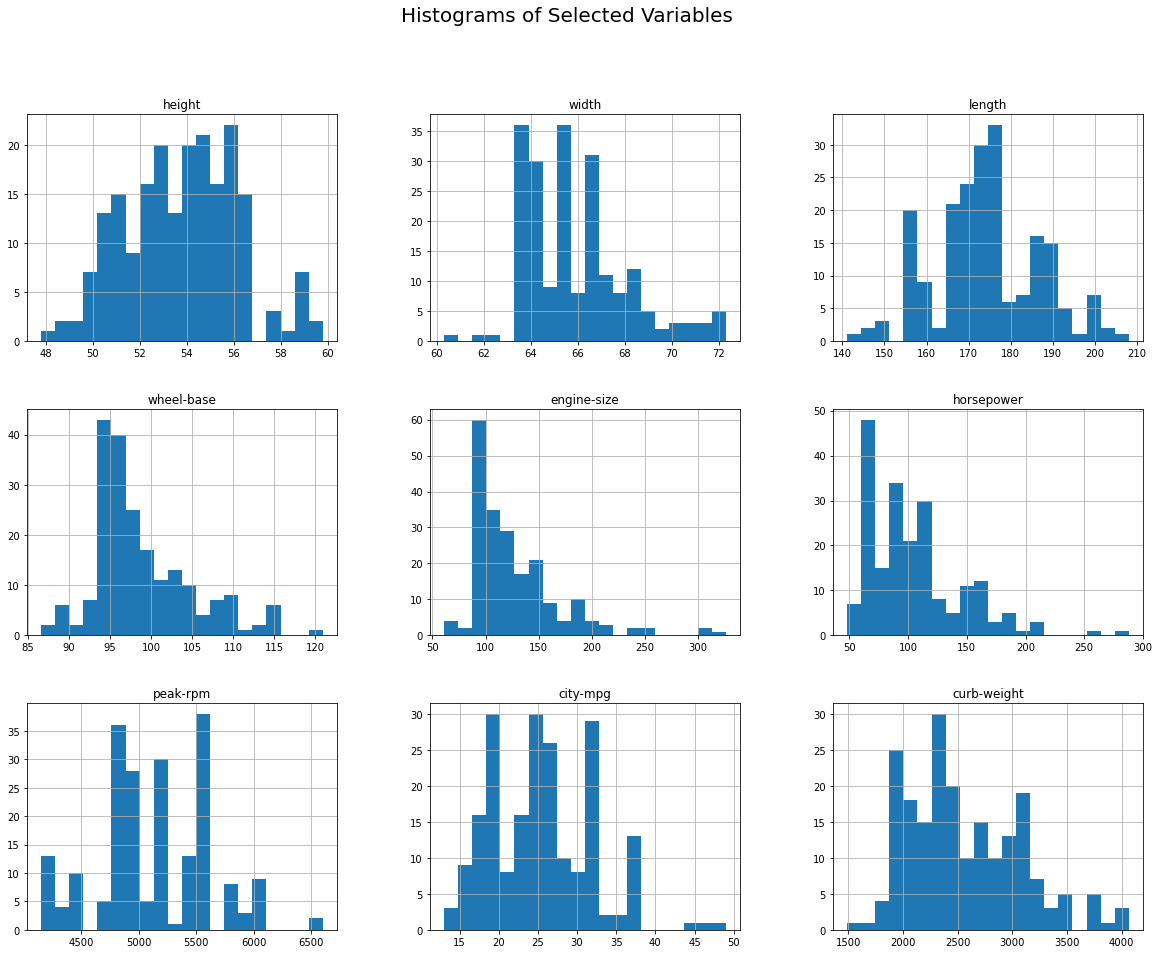

In [9]:
# Plotting histograms for each variable
df_selected.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histograms of Selected Variables", fontsize=20)
plt.show()

The histograms provided show the frequency distributions of various car attributes: height, width, length, wheel-base, engine size, city-mpg (miles per gallon), and curb weight. Each histogram's x-axis represents a measurement range for the attribute, while the y-axis shows how many cars fall within each interval. For instance, most cars have a height around 50-55 inches, and a width around 65-70 inches. The length distribution is fairly spread out with a slight concentration around 175-185 inches. Engine sizes mainly cluster around 60-120 cubic inches, while city-mpg is most frequently between 25-30 mpg. The curb weight shows a broad distribution with a peak around 2500-3000 pounds. These visualizations help understand the commonality and variance of these car features.

## Correlation Analysis

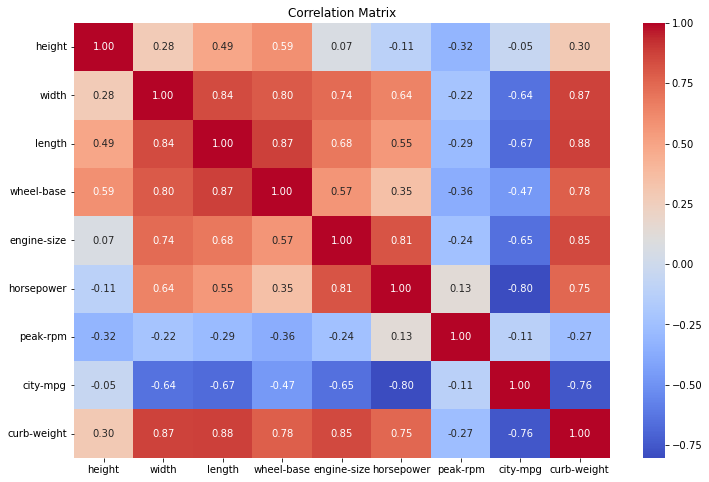

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The heatmap appears to be a correlation matrix for various car attributes. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and values close to 0 indicate no correlation. High positive correlations are visible between width, length, and Engine size, suggesting that larger cars overall tend to have proportionally larger dimensions in these aspects. Wheel base is moderately correlated with these dimensions, implying bigger cars often have bigger wheel. There's a strong negative correlation between city-mpg and curb-weight, indicating heavier cars tend to be less fuel-efficient in the city. This heatmap is a useful tool for quickly understanding relationships between car attributes.

## Box Plots for Variable Comparison

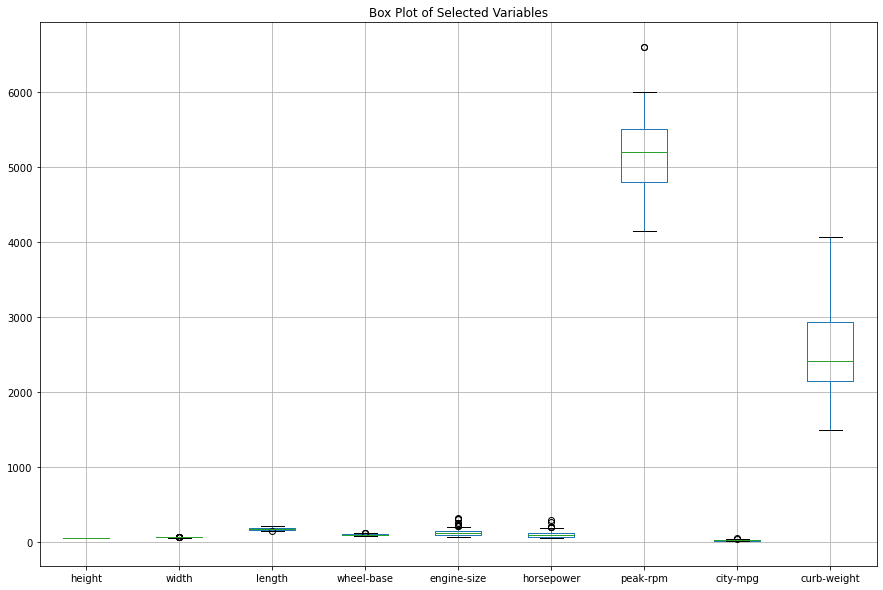

In [11]:
# Box plots for comparing variables
plt.figure(figsize=(15, 10))
df_selected.boxplot()
plt.title("Box Plot of Selected Variables")
plt.show()

The boxplot image shows the distribution of various car-related variables such as height, width, length, wheel-base, engine-size, horsepower, peak-rpm, city-mpg, and curb-weight. Boxplots depict the median (central line in the box), interquartile range (IQR, the box itself), and potential outliers (dots outside of the 'whiskers'). Variables like height, width, and length have relatively small IQRs, indicating less variability. Engine size and curb-weight have wider IQRs, showing more variation in the data. The plot for city-mpg displays an outlier, suggesting an exceptional value that's notably higher than the rest. These visualizations are useful for comparing the spread and central tendencies of the variables at a glance.

## Scatter Plots for Predictive Inferences

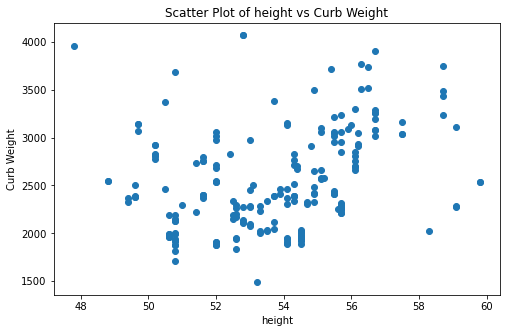

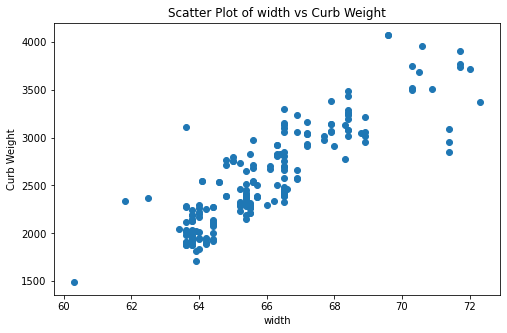

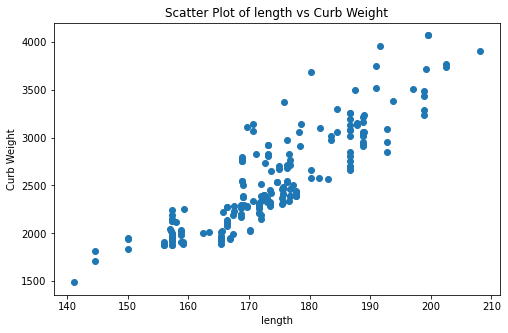

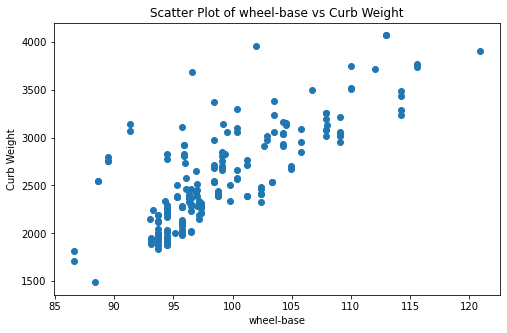

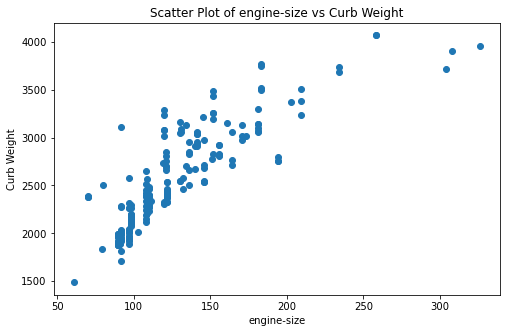

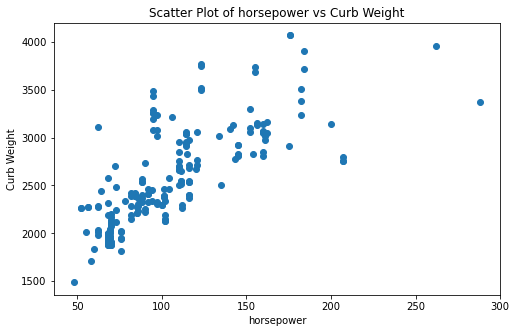

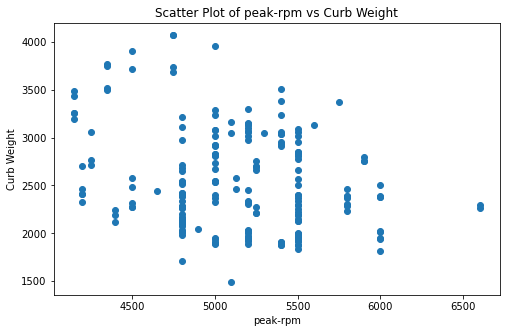

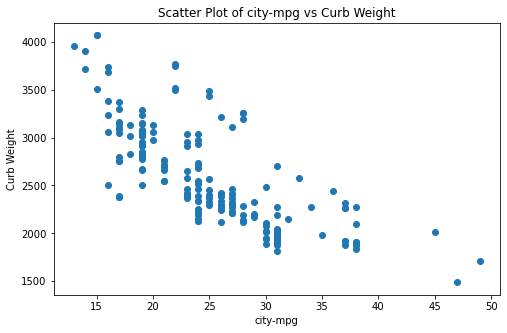

In [12]:
# Scatter plots for variables vs the response variable ('curb_weight')
for column in df_selected.columns:
    if column != 'curb-weight':
        plt.figure(figsize=(8, 5))
        plt.scatter(df_selected[column], df_selected['curb-weight'])
        plt.xlabel(column)
        plt.ylabel('Curb Weight')
        plt.title(f'Scatter Plot of {column} vs Curb Weight')
        plt.show()

# 3. Regression Model Construction & Evaluation

## Selection of Explanatory Variables

Based on the insights from the Exploratory Data Analysis (EDA), I will construct two different linear regression models. The selection of explanatory variables for these models is influenced by the observed correlations, distributions, and potential predictive relationships identified during EDA.  
* Model 1 will include variables that showed a strong positive correlation with 'curb_weight'. These are likely to be 'width', 'length', and 'engine_size'.
* Model 2 will include a mix of variables with both high and moderate correlation to 'curb_weight', such as 'height', 'horsepower', and 'city_mpg'.  

## Implementation of K-Fold Cross Validation

K-fold cross-validation will be used to evaluate the models. This involves splitting the dataset into 'K' subsets. For each iteration, one subset is used as the test set, and the remaining subsets are combined to form the training set. This process is repeated 'K' times, with each subset used exactly once as the test set. The choice of 'K' affects the balance between model bias and variance. A common choice is 'K=5' or 'K=10', and for this analysis, I'll use 'K=5'.  

## Model Construction and Evaluation

Using the LinearRegression model from scikit-learn and the KFold and cross_val_score methods, we will construct and evaluate the models.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

# Extracting the independent variables for each model
X1 = df_selected[['width', 'length', 'engine-size']]  # Model 1 variables
X2 = df_selected[['height', 'wheel-base', 'horsepower']]  # Model 2 variables
y = df_selected['curb-weight']  # Dependent variable

# Creating linear regression models
model_1 = LinearRegression()
model_2 = LinearRegression()

# K-Fold Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating Model 1
scores_model_1 = cross_val_score(model_1, X1, y, cv=kf, scoring='r2')

# Evaluating Model 2
scores_model_2 = cross_val_score(model_2, X2, y, cv=kf, scoring='r2')

# Calculating average R^2 scores
avg_r2_model_1 = scores_model_1.mean()
avg_r2_model_2 = scores_model_2.mean()

print(f"Average R^2 Score for Model 1: {avg_r2_model_1}")
print(f"Average R^2 Score for Model 2: {avg_r2_model_2}")


Average R^2 Score for Model 1: 0.8932557284079066
Average R^2 Score for Model 2: 0.8555892033418001


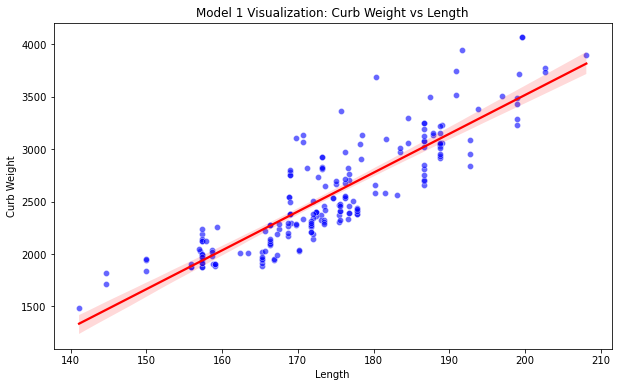

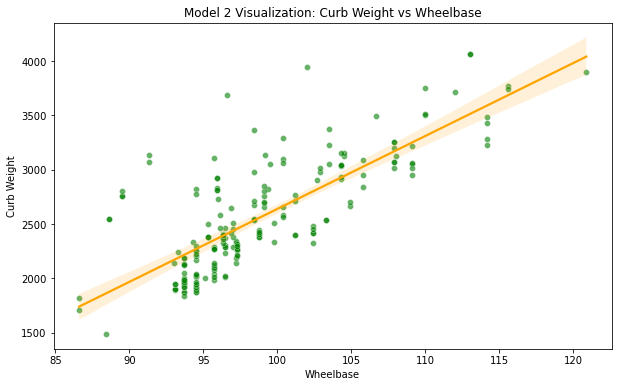

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model 1 Visualization using 'width'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_selected['length'], y=df_selected['curb-weight'], color='blue', alpha=0.6)
sns.regplot(x=df_selected['length'], y=df_selected['curb-weight'], scatter=False, color='red')
plt.title('Model 1 Visualization: Curb Weight vs Length')
plt.xlabel('Length')
plt.ylabel('Curb Weight')
plt.show()

# Model 2 Visualization using 'wheelbase'
# Check if 'wheelbase' is available and valid for plotting
if 'wheel-base' in df_selected.columns and not df_selected['wheel-base'].isnull().all():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_selected['wheel-base'], y=df_selected['curb-weight'], color='green', alpha=0.6)
    sns.regplot(x=df_selected['wheel-base'], y=df_selected['curb-weight'], scatter=False, color='orange')
    plt.title('Model 2 Visualization: Curb Weight vs Wheelbase')
    plt.xlabel('Wheelbase')
    plt.ylabel('Curb Weight')
    plt.show()
else:
    print("Wheelbase data is not suitable for visualization.")


Based on the results and the visualizations provided, we can interpret and understand the performance of the two linear regression models as follows:

## Model 1 Visualization: Curb Weight vs Length

* The plot shows a positive relationship between 'length' and 'curb weight', meaning as the length of the vehicle increases, the curb weight also tends to increase.
* The regression line fits closely to the data points, which is confirmed by the high R² score of 0.8933, indicating that approximately 89.33% of the variability in curb weight can be explained by the length of the vehicle along with other variables included in Model 1.

## Model 2 Visualization: Curb Weight vs Wheelbase

* Similarly, the plot for Model 2 exhibits a positive correlation between 'wheelbase' and 'curb weight'. This suggests that vehicles with a longer wheelbase are generally heavier.
* The fit for Model 2, indicated by the regression line, also seems to be good. However, the R² score for Model 2 is lower at 0.8556, meaning that around 85.56% of the variability in curb weight is explained by the model, which is less than Model 1.

## Comparative Interpretation

* Comparing the two models, Model 1 has a higher R² score, indicating it has a better fit than Model 2. This could be due to the combination of variables included in Model 1 having a stronger and more consistent relationship with 'curb weight'.
* The plots show that both 'length' and 'wheelbase' are important factors in predicting curb weight, but when combined with other variables in Model 1, the prediction is more accurate.
* The slight spread of data points around the regression line in both plots suggests there is still some variability that is not captured by the models, which could potentially be explained by other variables not included in these models or by non-linear relationships.

# 4. Conclusion

In conclusion, while both models appear to be good predictors of curb weight, Model 1 is the preferred model because of its higher R² score. It should be noted that the models include more variables than just 'length' and 'wheelbase'. To fully evaluate the models, one should consider all the variables included and their interactions. The high R² scores indicate that both models are likely to be reliable for predicting the curb weight of vehicles based on the data provided. However, Model 1 should be chosen for the best predictive performance according to the results of the K-fold cross-validation.